**Data Cleaning**

6/20/2022 I am in search for a laptop for college. Features that are important to me are weight, ram, screen size and of course price. Let's see what we can discover! This dataset is from Kaggle (https://www.kaggle.com/datasets/muhammetvarl/laptop-price).

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv(r"C:\Users\chane\OneDrive\Documents\Datasets\laptop_price.csv", encoding='ISO-8859-1')

In [2]:
# Show columns and first five rows of data
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
# Show column types
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [4]:
# Check for null values
print(df.isnull().sum())

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [5]:
# Check for duplicates in the data
df.duplicated().sum()

0

In [6]:
# Drop a column that has unique ids I don't need
df.drop(columns = ['laptop_ID'], inplace = True)

In [7]:
# Drop kg and change the column type to float
df["Weight"] = df["Weight"].str.replace('kg','').astype(float)
# Drop GB and change the column type to int
df["Ram"] = df["Ram"].str.replace('GB','').astype(int)

In [ ]:
df.head()

In [8]:
# Convert currency to USD
df3 = pd.DataFrame(df)
# For loop to multiply the data points in Price_euros column by 1.07. 1 euro = 1.07 USD
currency=[]
for value in df["Price_euros"]:
    currency.append(value*1.07)
# Create new column with the converted currency
df3["CURRENCY(in USD)"] = currency

df3

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,CURRENCY(in USD)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1433.4683
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,961.8658
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,615.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2715.0715
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1929.8520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,682.6600
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1603.9300
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,245.0300
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,817.4800


In [ ]:
# Drop an unneeded column
df3.drop(columns = ['Price_euros'], inplace = True)

In [12]:
# Rename columns
df3.columns = ['Company', 'Prod', 'Type','Screen Size (Inches)', 'Screenres', 'Cpu', 'RAM (GB)', 'Storage', 'Gpu',
               'Opsys', 'Weight (kg)','Price (USD)']
df3.head()

,Company,Prod,Type,Screen Size (Inches),Screenres,Cpu,RAM (GB),Storage,Gpu,Opsys,Weight (kg),Price (USD)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1433.4683
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,961.8658
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,615.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2715.0715
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1929.8520


In [13]:
# Round price to 2 decimals
df3['Price (USD)'] = np.round(df3['Price (USD)'], decimals = 2)
df3.head()

,Company,Prod,Type,Screen Size (Inches),Screenres,Cpu,RAM (GB),Storage,Gpu,Opsys,Weight (kg),Price (USD)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1433.47
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,961.87
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,615.25
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2715.07
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1929.85


In [14]:
# Summary stats for possible variables
df3[['Screen Size (Inches)', 'Weight (kg)', 'RAM (GB)','Price (USD)']].describe()

,Screen Size (Inches),Weight (kg),RAM (GB),Price (USD)
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,2.038734,8.382195,1202.345012
std,1.426304,0.665475,5.084665,747.939738
min,10.100000,0.690000,2.000000,186.180000
25%,14.000000,1.500000,4.000000,640.930000
50%,15.600000,2.040000,8.000000,1045.390000
75%,15.600000,2.300000,8.000000,1592.030000
max,18.400000,4.700000,64.000000,6525.930000


What does this tell me? 

MEAN - The average screen size is 15 inches. The average weight is 2 kg, which is 4.4 lbs. The average RAM is 8.4 GB. The average price is 1,202 dollars.
MAX - The maximum screen size is 18.4 inches.

C:\Users\chane\AppData\Local\Temp\ipykernel_3004\1662599620.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,1,count)


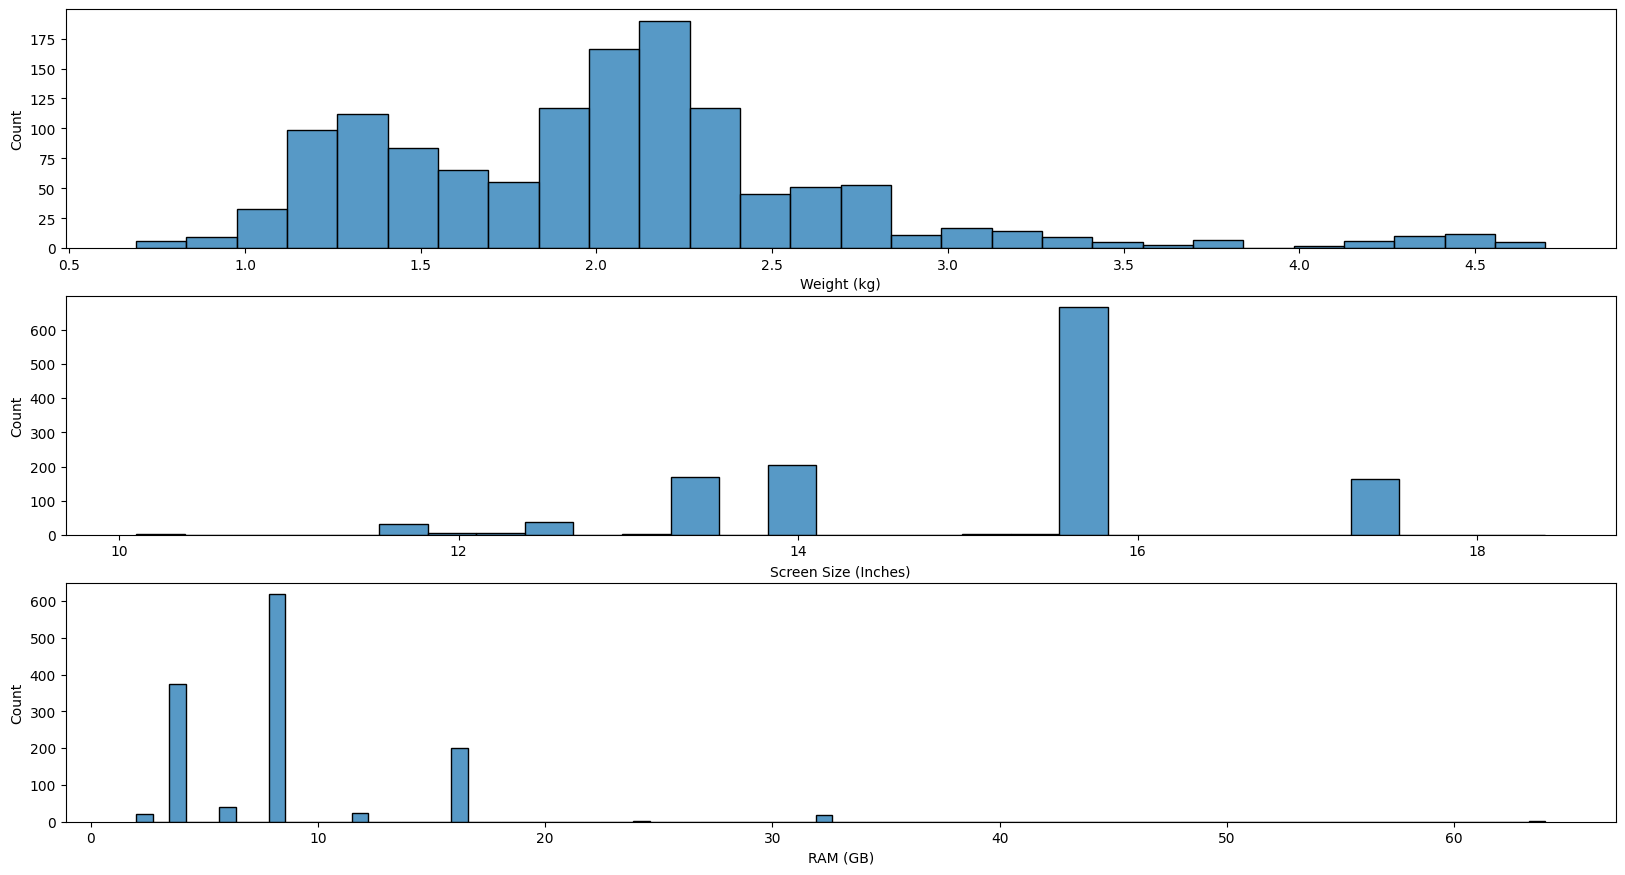

In [17]:
#visualize features I am interested in
features = ['Weight (kg)','Screen Size (Inches)','RAM (GB)']
count=1
plt.subplots(figsize=(20, 18))
for f in features:
    plt.subplot(5,1,count)
    sns.histplot(x = f, data = df3)
    count+=1
plt.show()

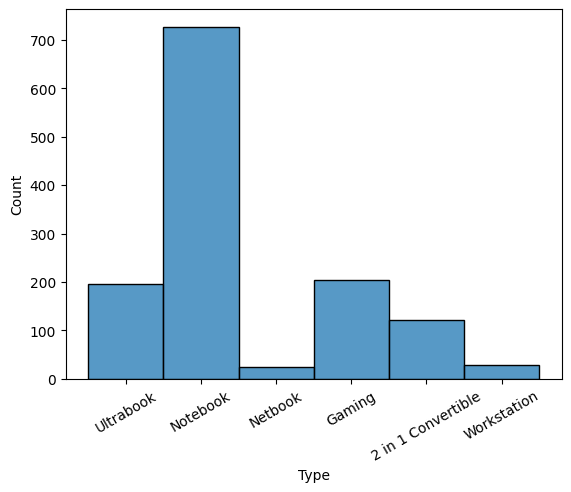

In [18]:
# Visualize laptop type
sns.histplot(x = 'Type', data = df3)
plt.xticks(rotation=30);

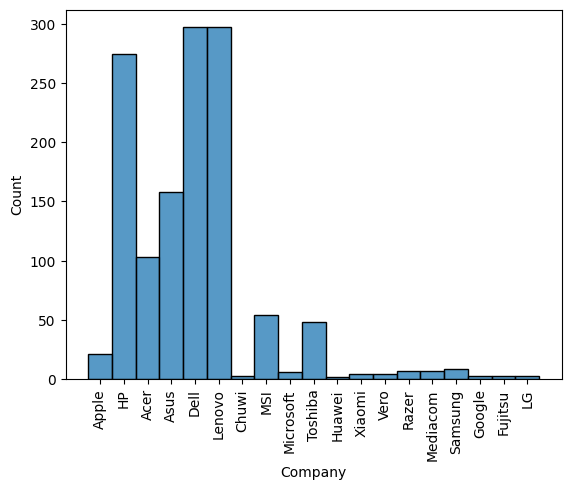

In [19]:
#Visualize popular product brands

sns.histplot(x = 'Company', data = df3)
plt.xticks(rotation='vertical');

---

**Linear Regression**

In [92]:
import statsmodels.api as sm

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Price (USD)   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     562.2
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          3.83e-234
Time:                        17:14:56   Log-Likelihood:                -9928.5
No. Observations:                1303   AIC:                         1.987e+04
Df Residuals:                    1299   BIC:                         1.989e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1305.7578 

**Quick Interpretation of Results:**

The R-squared is 0.565, which indicates that 56.5% of the variance in the laptop price can be explained by the selected features.

The coefficents of the features I am interested are statistically significant excluding weight. The amount of RAM a laptop has the greatest statistically significance with a T-test score of 38. Screen size negatively impacts the price of a laptop. 



---

**Data Visualization of Questions I Had**

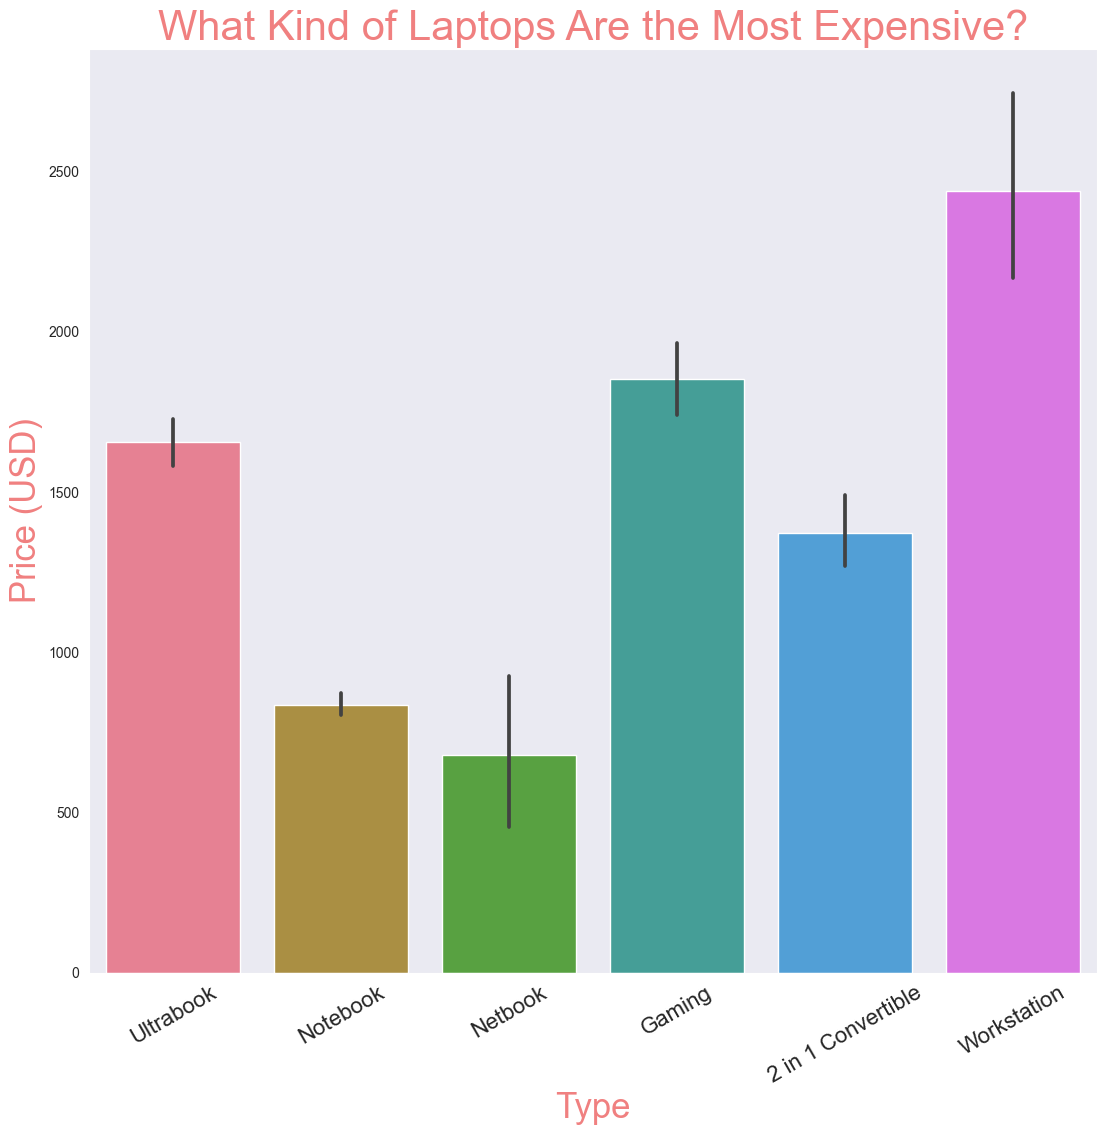

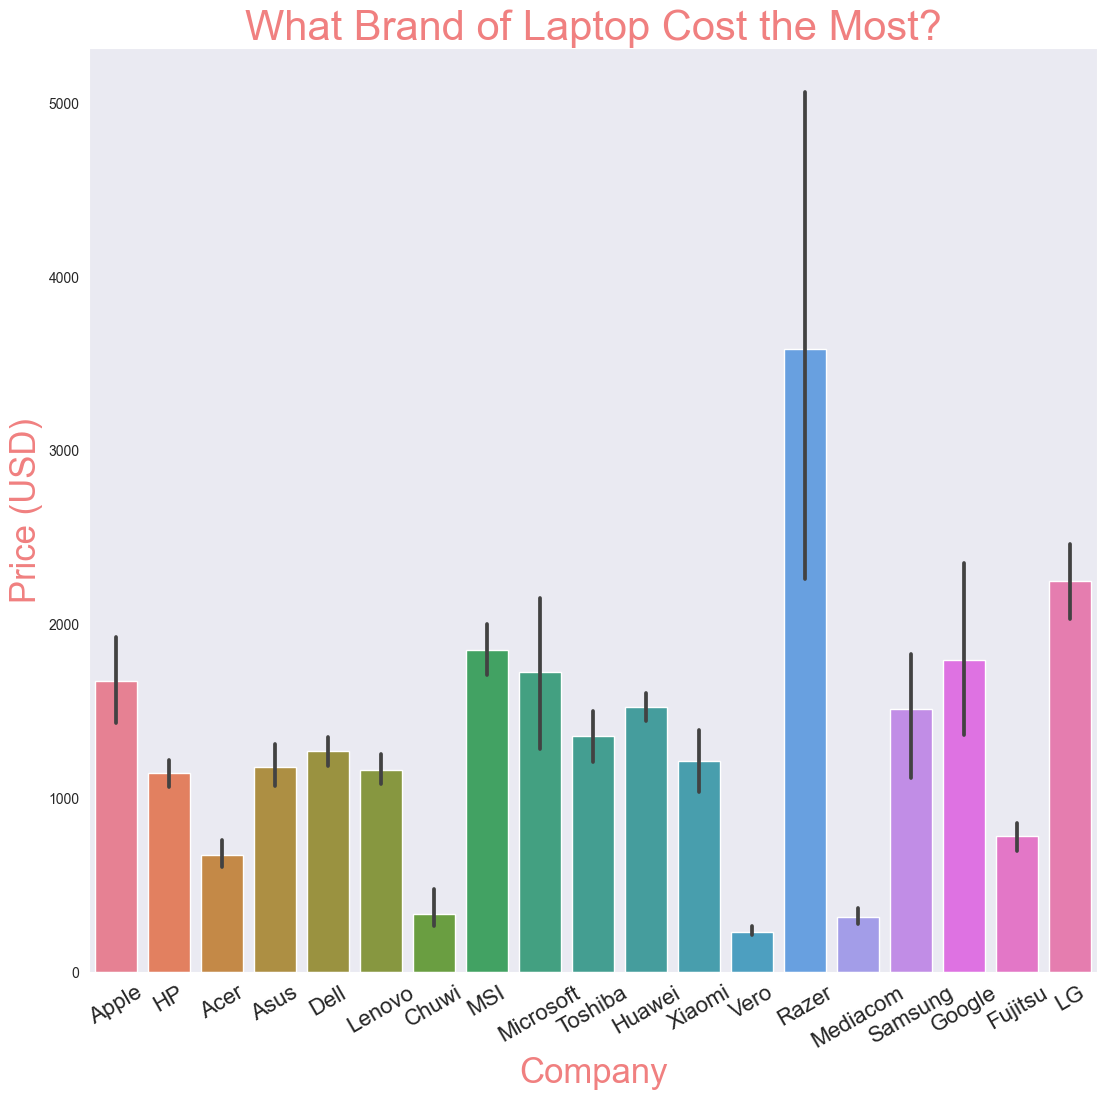

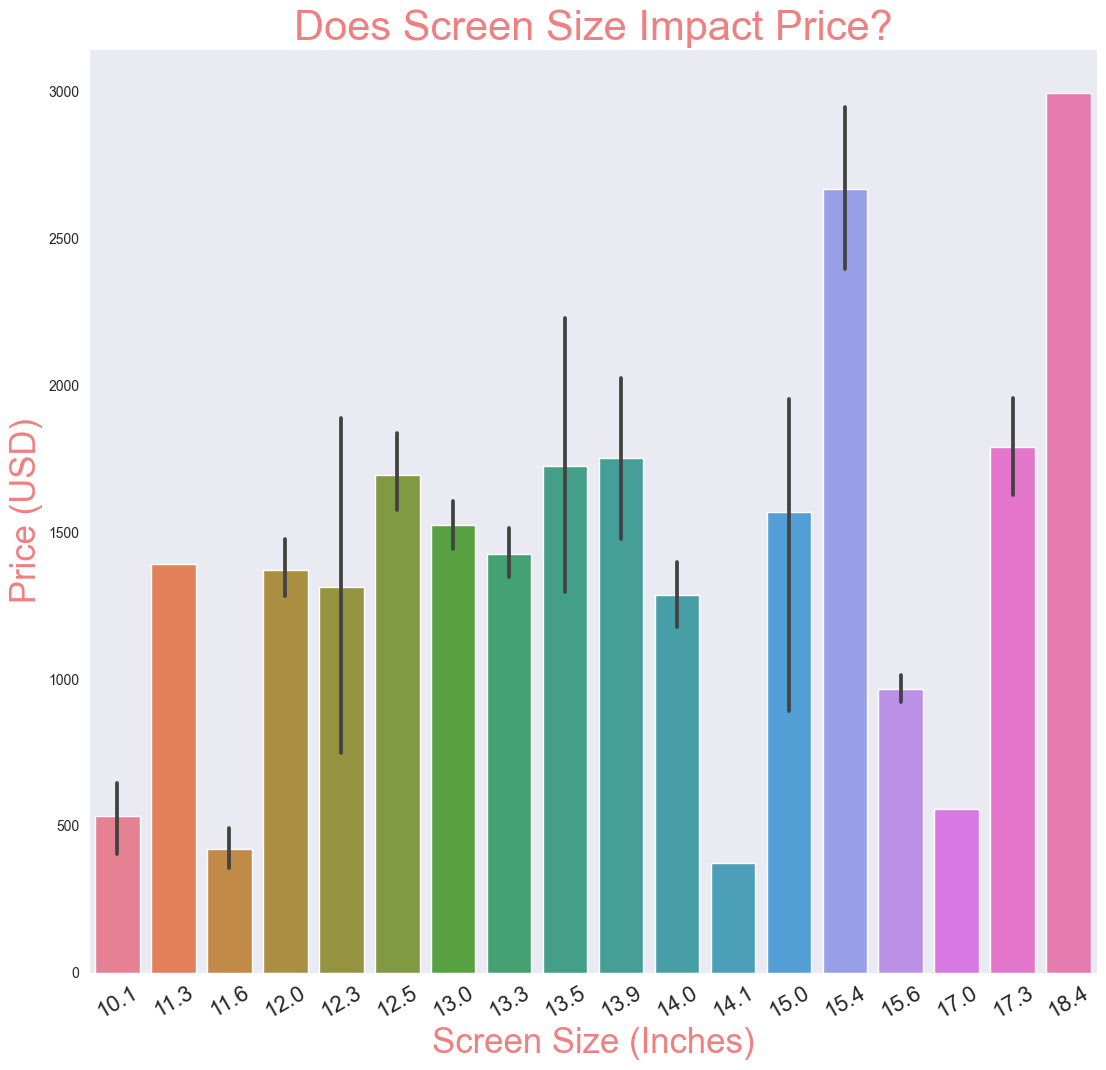

In [148]:
features = ['Type','Company', 'Screen Size (Inches)']
title = ['What Kind of Laptops Are the Most Expensive?', 'What Brand of Laptop Cost the Most?',
        'Does Screen Size Impact Price?']
xtitle = ['Type', 'Company', 'Screen Size (Inches)']
i = 0

# size the figure and create barplot
for f in features:
    plt.figure(figsize=(13,12))
    sns.barplot(data= df3, x= f, y='Price (USD)', palette='husl')
    plt.xticks(size = 16, rotation = 30)
    plt.title(title[i], fontsize=30, color='lightcoral')
    plt.ylabel("Price (USD)", fontsize=25, color='lightcoral')
    plt.xlabel(xtitle[i], fontsize=25, color='lightcoral');
    i = i + 1
plt.show()

**Findings:**

Workstation and Gaming laptops are most expensive, which is expected as they often have better GPUs and CPUs to run more strenuous programs. Razer, the lead lifestyle brand for gamers, has the most expensive laptops available. 18.4 inch screen laptops are most expensive. However, laptops with 14.1 and 15.6 inch screens saw lower prices as they are most popular among users.

---

**SQL Statements**

In [ ]:
import sqlalchemy as sql
engine = create_engine('sqlite://', echo=False)

df3.to_sql('laptop_price', con=engine, index=False)

1303

In [ ]:
# find laptops that have 8 GB RAM and are less than 15.4 inches screen size.
with engine.connect() as connection:
    result = connection.execute(text("select Prod from laptop_price where `RAM (GB)` = 8 and `Screen Size (Inches)` < 15.4"))
    for row in result:
        print(row)

('MacBook Pro',)
('Macbook Air',)
('MacBook Pro',)
('Macbook Air',)
('Swift 3',)
('MacBook 12"',)
('MacBook Pro',)
('XPS 13',)
('Inspiron 5379',)
('MacBook Air',)
('MacBook Air',)
('MacBook Pro',)
('ProBook 430',)
('Vostro 5471',)
('IdeaPad 520S-14IKB',)
('UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10)',)
('Inspiron 5370',)
('Aspire E5-475',)
('MacBook 12"',)
('ProBook 440',)
('XPS 13',)
('Zenbook UX430UA',)
('Spin 5',)
('Envy 13-ad009n',)
('Surface Laptop',)
('UX430UQ-GV209R (i7-7500U/8GB/256GB/GeForce',)
('Thinkpad T470',)
('XPS 13',)
('ThinkPad Yoga',)
('XPS 13',)
('Spectre x360',)
('Probook 440',)
('Probook 440',)
('Swift 3',)
('Probook 440',)
('ThinkPad E480',)
('ZenBook UX430UA',)
('EliteBook Folio',)
('ZenBook Flip',)
('MateBook X',)
('Spectre x360',)
('XPS 13',)
('Swift 7',)
('Mi Notebook',)
('Inspiron 5379',)
('ProBook 430',)
('XPS 13',)
('XPS 13',)
('MateBook X',)
('Inspiron 5370',)
('Probook 440',)
('Latitude 5490',)
('Yoga 520-14IKB',)
('Portege Z30-C-16L',)
('Vostro 5468',)
(

In [109]:
# I am interested in a MacBook. Is there one under 1,000 dollars? | RESULTS: 1
with engine.connect() as connection:
    result = connection.execute(text("select Prod from laptop_price where company = 'Apple' and `Price (USD)` <1000"))
    for row in result:
        print(row)

('Macbook Air',)


*Looks like I am getting a Macbook Air!*